In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [12]:
df = pd.read_csv('HR_comma_sep.csv')

In [13]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [15]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [20]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_sales,Department_accounting,Department_hr,Department_technical,Department_support,Department_management,Department_IT,Department_product_mng,Department_marketing,Department_RandD
0,0.38,0.53,2,157,3,0,1,0,low,1,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,1,0,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,1,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,low,1,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,low,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0,0,0,0,1,0,0,0,0,0
14995,0.37,0.48,2,160,3,0,1,0,low,0,0,0,0,1,0,0,0,0,0
14996,0.37,0.53,2,143,3,0,1,0,low,0,0,0,0,1,0,0,0,0,0
14997,0.11,0.96,6,280,4,0,1,0,low,0,0,0,0,1,0,0,0,0,0


In [21]:
label_enc = LabelEncoder()
df["salary"] = label_enc.fit_transform(df["salary"])

In [22]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_sales,Department_accounting,Department_hr,Department_technical,Department_support,Department_management,Department_IT,Department_product_mng,Department_marketing,Department_RandD
0,0.38,0.53,2,157,3,0,1,0,1,1,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,2,1,0,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,2,1,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,1,0,0,0,0,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,1,0,0,0,0,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,1,0,0,0,0,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,1,0,0,0,0,0


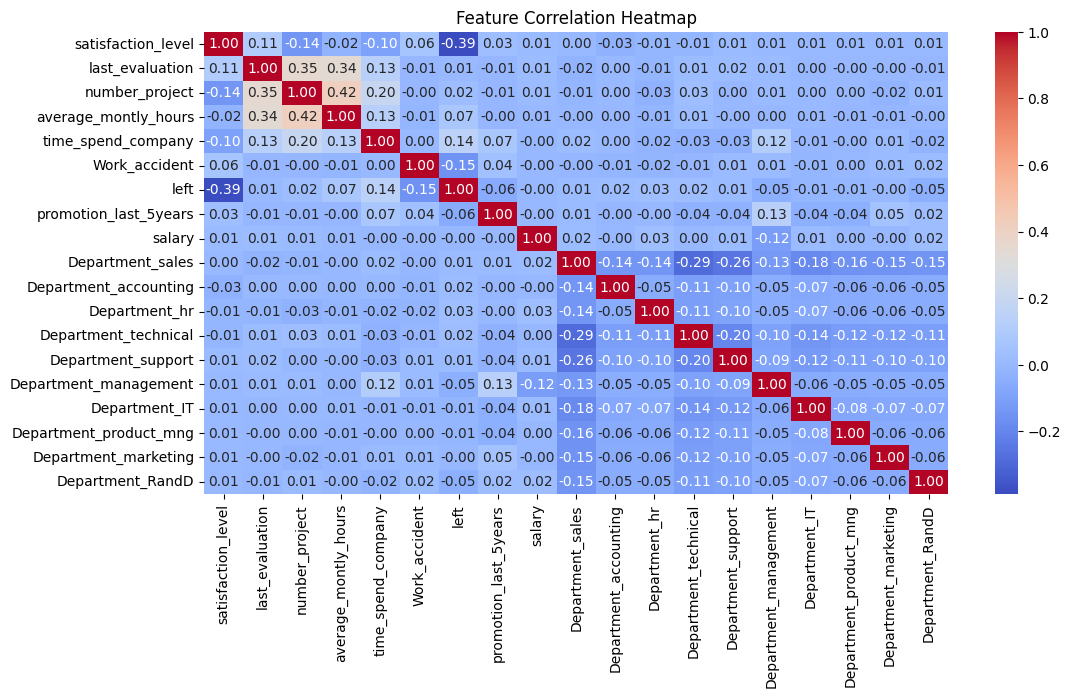

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
correlation = df.corr()["left"].sort_values(ascending=False)
print("Correlation with Employee Retention:\n", correlation)

Correlation with Employee Retention:
 left                      1.000000
time_spend_company        0.144822
average_montly_hours      0.071287
Department_hr             0.028249
number_project            0.023787
Department_technical      0.020076
Department_accounting     0.015201
Department_support        0.010700
Department_sales          0.009923
last_evaluation           0.006567
Department_marketing     -0.000859
salary                   -0.001294
Department_IT            -0.010925
Department_product_mng   -0.011029
Department_management    -0.046035
Department_RandD         -0.046596
promotion_last_5years    -0.061788
Work_accident            -0.154622
satisfaction_level       -0.388375
Name: left, dtype: float64


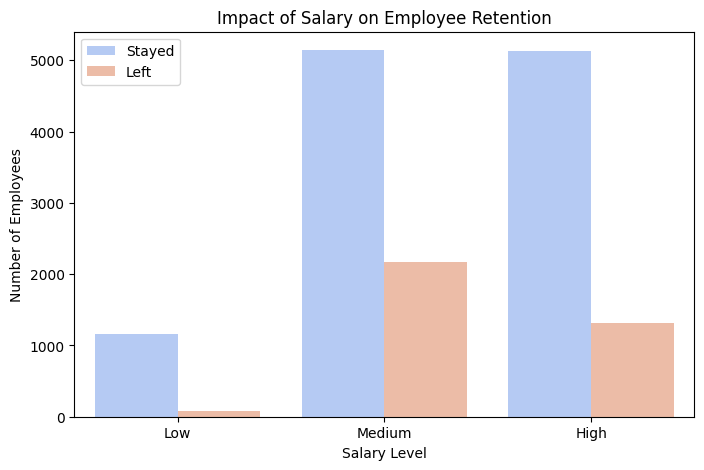

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x="salary", hue="left", data=df, palette="coolwarm")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.title("Impact of Salary on Employee Retention")
plt.xticks(ticks=[0, 1, 2], labels=["Low", "Medium", "High"])
plt.legend(["Stayed", "Left"])
plt.show()

<Figure size 1200x600 with 0 Axes>

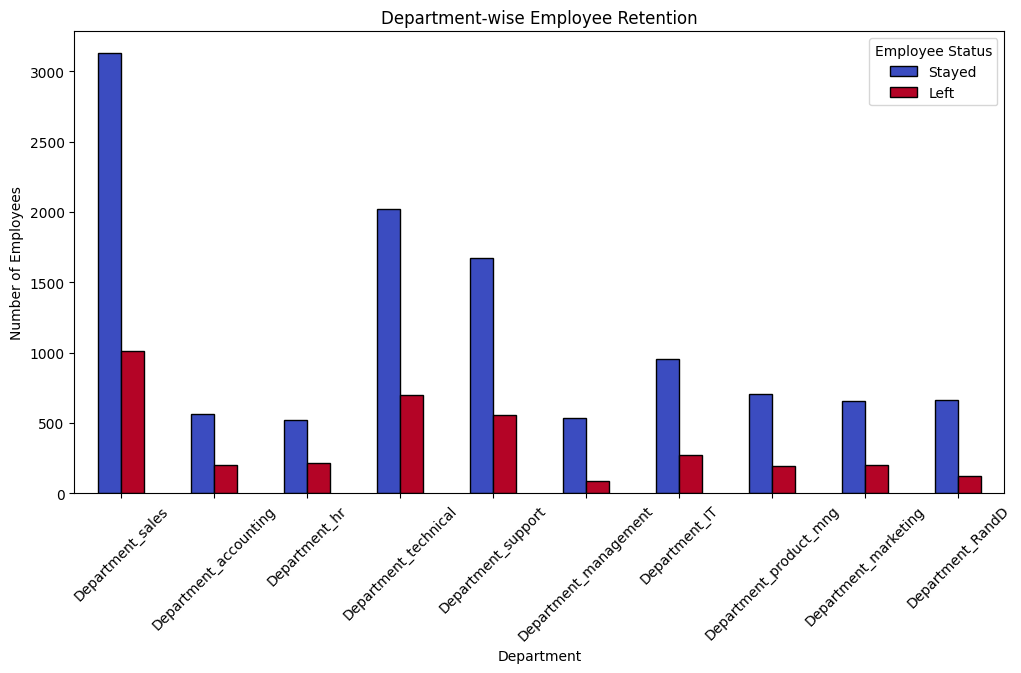

In [27]:
plt.figure(figsize=(12, 6))

# Group by 'left' and sum the department columns
dept_retention = df.groupby("left")[df.columns[df.columns.str.startswith("Department_")]].sum().T

# Plot the department-wise retention
dept_retention.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor="black")

plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.title("Department-wise Employee Retention")
plt.xticks(rotation=45)
plt.legend(["Stayed", "Left"], title="Employee Status")
plt.show()


In [28]:
features = ["satisfaction_level", "last_evaluation", "number_project",
            "average_montly_hours", "time_spend_company", "salary"]
features += [col for col in df.columns if "Department_" in col]  # Include department one-hot columns

In [29]:
X = df[features]  # Independent variables
y = df["left"]    # Target variable

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# 🔹 Step 7: Evaluate Model Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.76


In [31]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85      2294
           1       0.46      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000



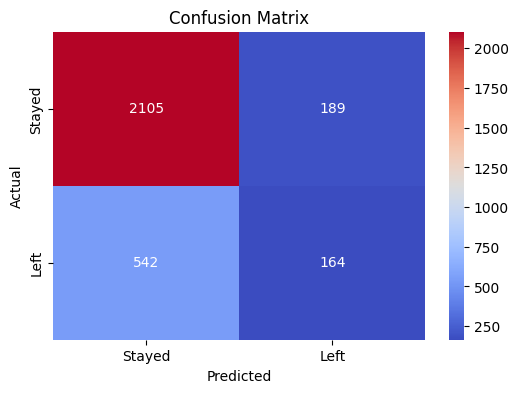

In [33]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
